# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df=pd.read_csv("fraud_d.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
#checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
#droping column_c39 as its doent adds any value
df.drop("_c39",axis=1,inplace=True)

In [5]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
#there are 21 object type columns rest are loat and int columns

In [6]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)
cat

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [8]:
#checking the value couts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

policy_bind_date
01-01-2006    3
05-08-1992    3
28-04-1992    3
16-07-2002    2
21-09-2005    2
             ..
08-04-1996    1
09-12-1992    1
17-06-2006    1
03-08-2010    1
17-06-2005    1
Name: policy_bind_date, Length: 951, dtype: int64

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handle

In [9]:
#extracting not object type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)
ncat

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [10]:
#checking the value couts in all the object type variable
for col in ncat:
    print(col)
    print(df[col].value_counts())
    print()

months_as_customer
194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

age
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

policy_number
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

policy_deductable
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

policy_annual_premium
1374.22    2
1558.29    2
1389.13    2
1073.83    2
1074.07    2
          .

In [ ]:
#univariate analysis

<AxesSubplot:xlabel='policy_bind_date', ylabel='count'>

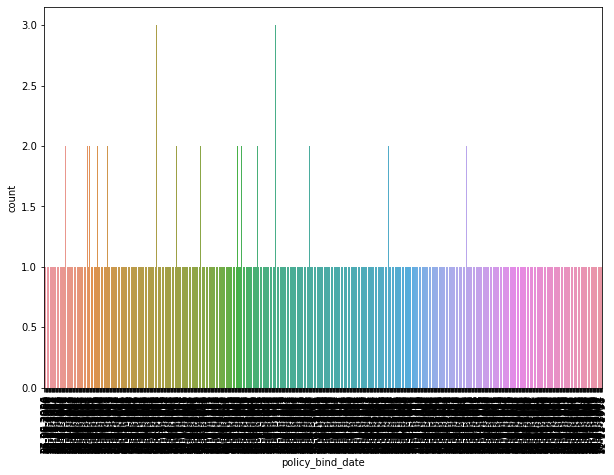

In [11]:
#policy_bind_date
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("policy_bind_date", data=df)

In [ ]:
#the policy bind date contain nearly all the unique value,wont add any value to the model

<AxesSubplot:xlabel='policy_state', ylabel='count'>

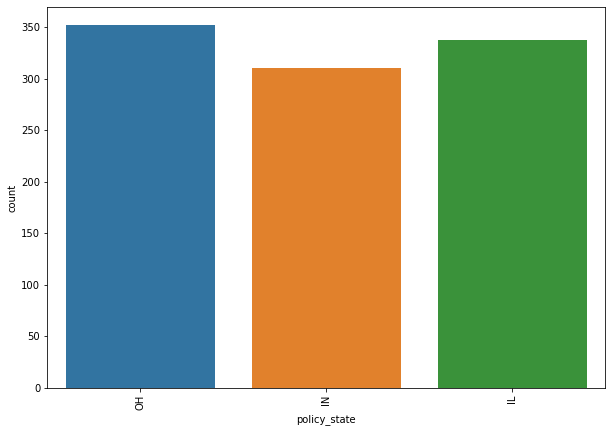

In [12]:
#policy_sate
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("policy_state", data=df)

In [ ]:
#Policy in all the state is approx equal

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

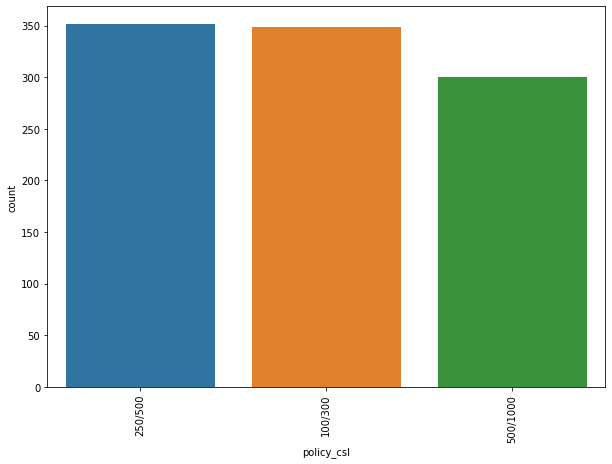

In [13]:
#policy_csl
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("policy_csl", data=df)

In [ ]:
#Policy_csl is nearly equal for all the values

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

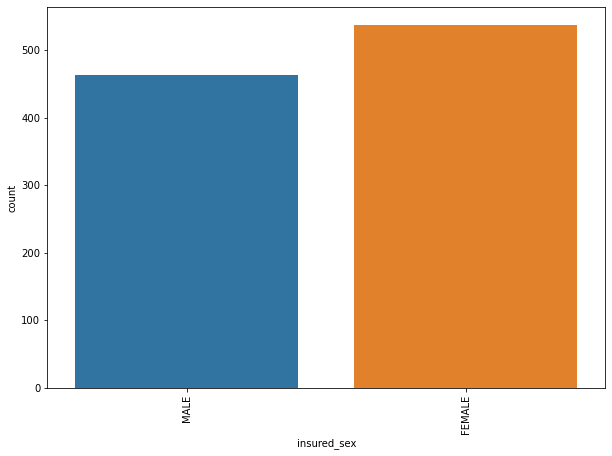

In [14]:
#Insured sex
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("insured_sex", data=df)

In [ ]:
#there are more number of female than male

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

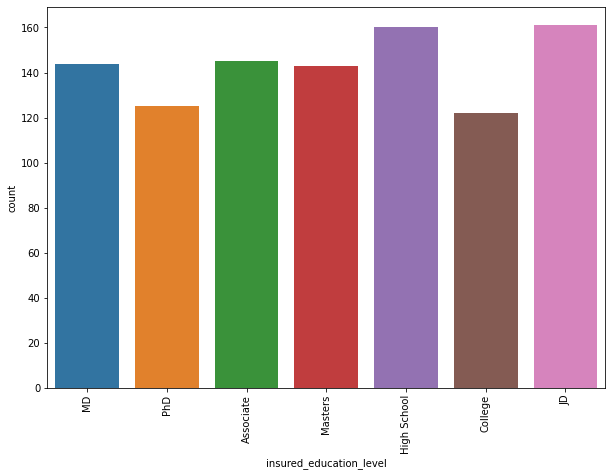

In [16]:
#Insured education level
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("insured_education_level", data=df)

In [ ]:
#People from all education background are insured comparabely

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

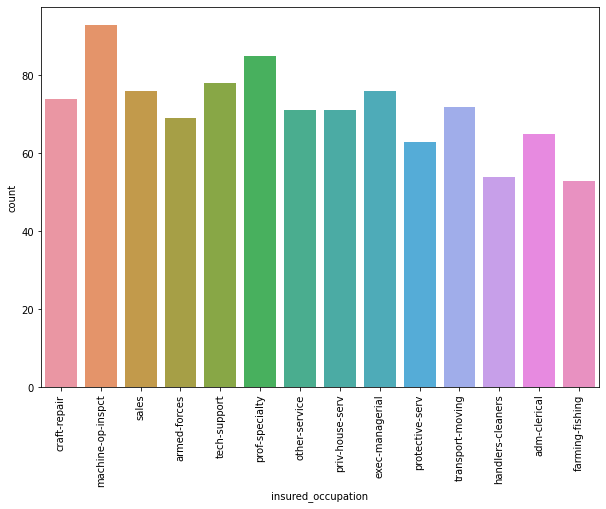

In [17]:
#Insure_occupation
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("insured_occupation", data=df)

In [ ]:
#the highest number of insured people employed in machine-op-inspct and prof-speciality while handlers cleaners has the lowest

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

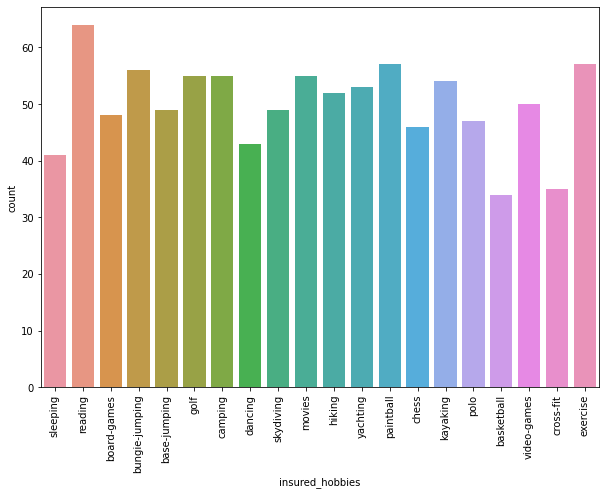

In [18]:
#Insured hobbies
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("insured_hobbies", data=df)

In [ ]:
#insured people are more inclied towards exercise and reading

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

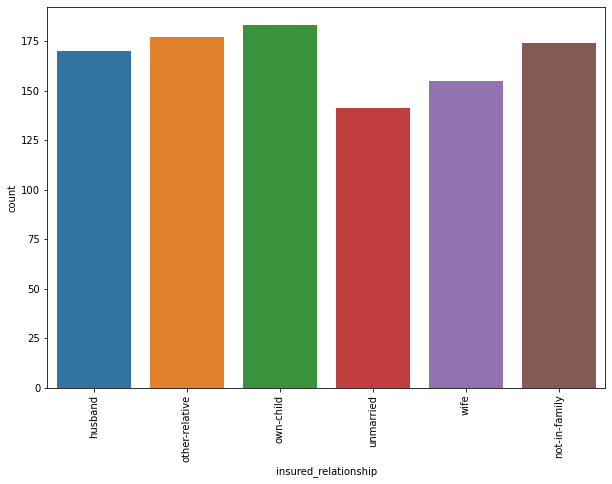

In [19]:
#insured relationship
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("insured_relationship", data=df)

In [ ]:
#the data is fairly distributed, however there are less number of unmaried insured people

<AxesSubplot:xlabel='incident_date', ylabel='count'>

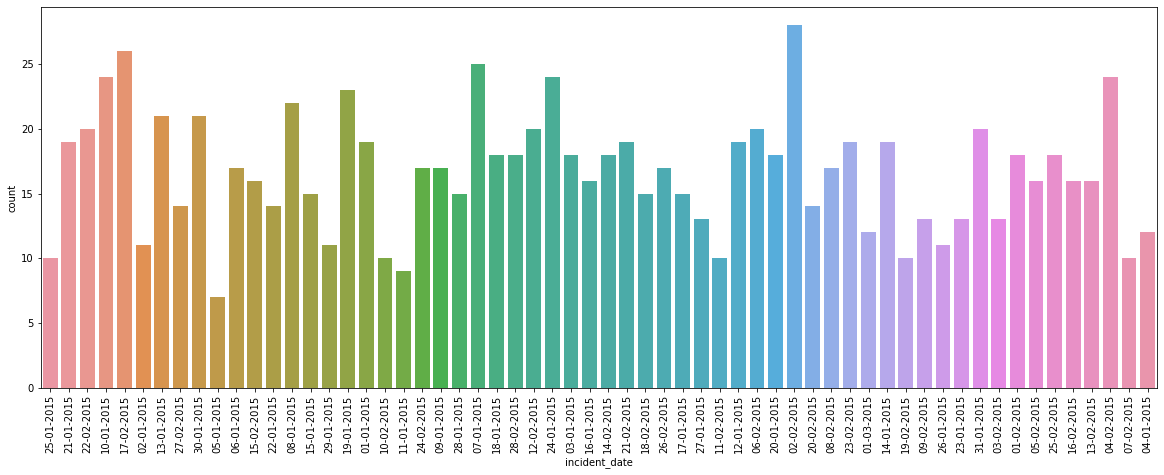

In [20]:
#Incident date
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot("incident_date", data=df)

In [ ]:
#the data contains the period of 2 months in 2015
#will process data in date and month

<AxesSubplot:xlabel='incident_type', ylabel='count'>

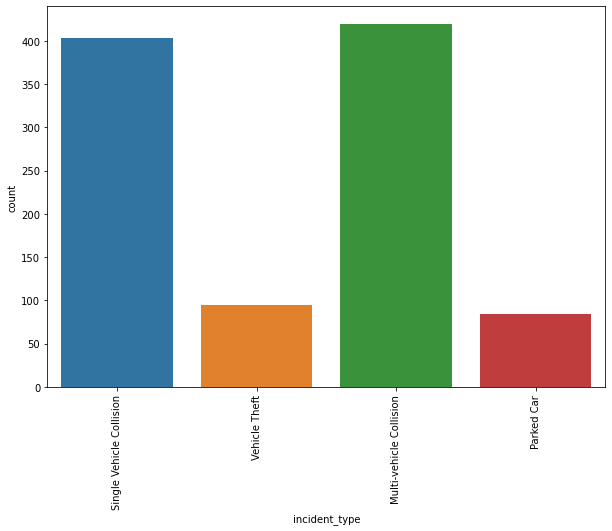

In [21]:
#Incident type
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("incident_type", data=df)

In [ ]:
#most number of incident are of type multiv vehical collison and very less incidet happend with parked car

<AxesSubplot:xlabel='collision_type', ylabel='count'>

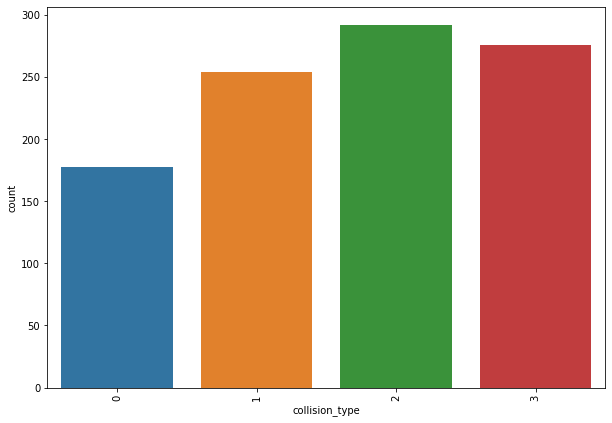

In [280]:
#collision type
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("collision_type", data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

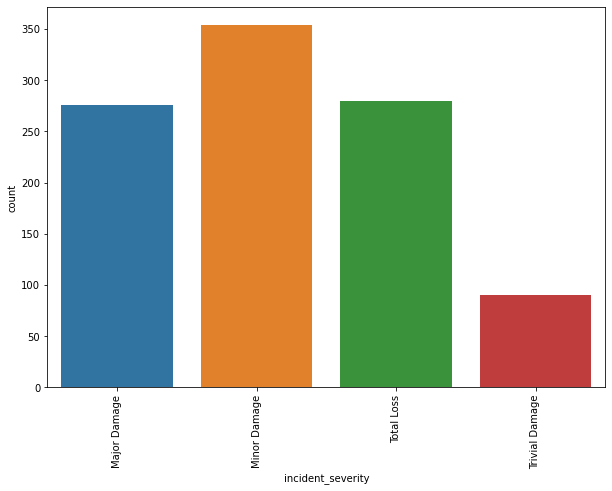

In [23]:
#Incident_severity
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("incident_severity", data=df)

In [ ]:
#very few vechile met with trival damage, most of the veichal sustained minor damage 

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

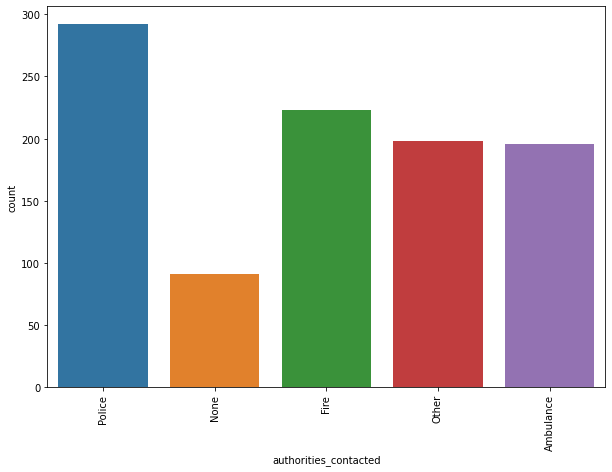

In [24]:
#Authorities contacted
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("authorities_contacted", data=df)

In [ ]:
#while majority of the people informed police at first, however there are people who didnt notify any authorities

<AxesSubplot:xlabel='incident_state', ylabel='count'>

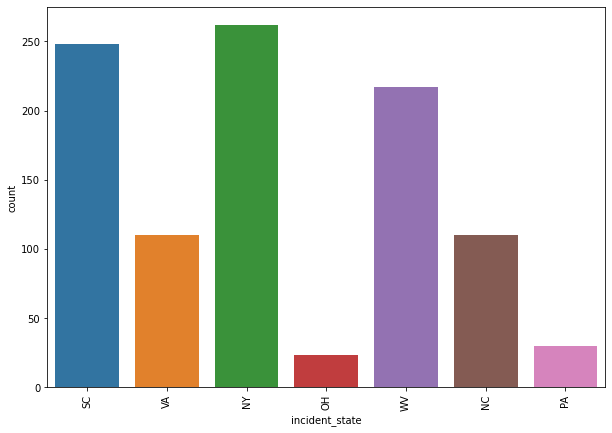

In [25]:
#Incident_state
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("incident_state", data=df)

In [ ]:
#most of the cases took place in sc, ny and wv while oh and pa saw least number of cases

<AxesSubplot:xlabel='incident_city', ylabel='count'>

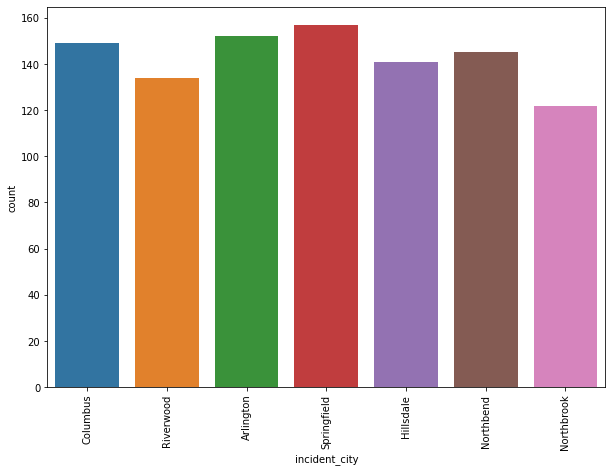

In [26]:
#Incident city
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("incident_city", data=df)

In [ ]:
#the data is fairly distributed in all the cities

<AxesSubplot:xlabel='incident_location', ylabel='count'>

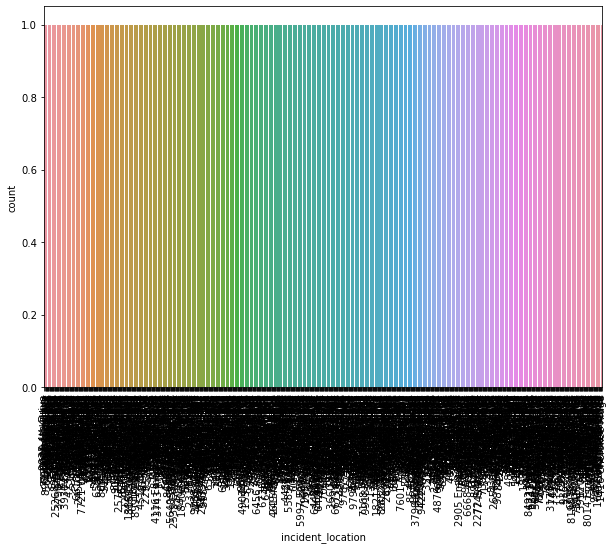

In [27]:
#PolicyBind date
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("incident_location", data=df)

In [ ]:
#since it has too much unique variable, will drop this column

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

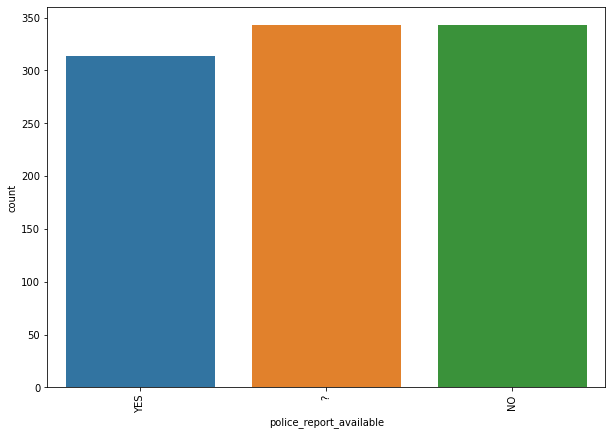

In [28]:
#Police report available
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("police_report_available", data=df)

In [ ]:
#in most of the cases there is either no police report or no surerity about it

<AxesSubplot:xlabel='auto_make', ylabel='count'>

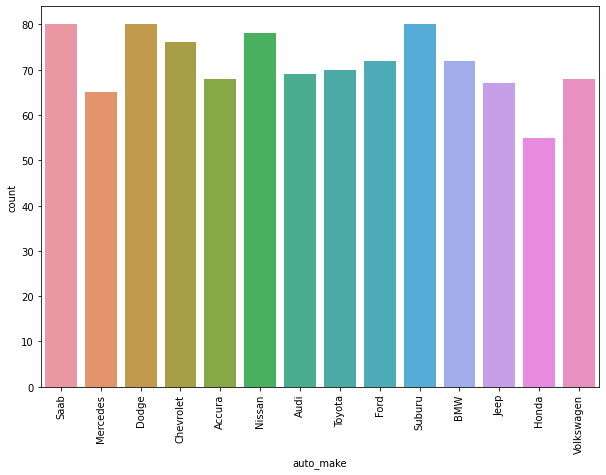

In [29]:
#Auto make
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("auto_make", data=df)

In [ ]:
#the data is fairly distributed however there areless number of cases with honda and mercedes

<AxesSubplot:xlabel='auto_model', ylabel='count'>

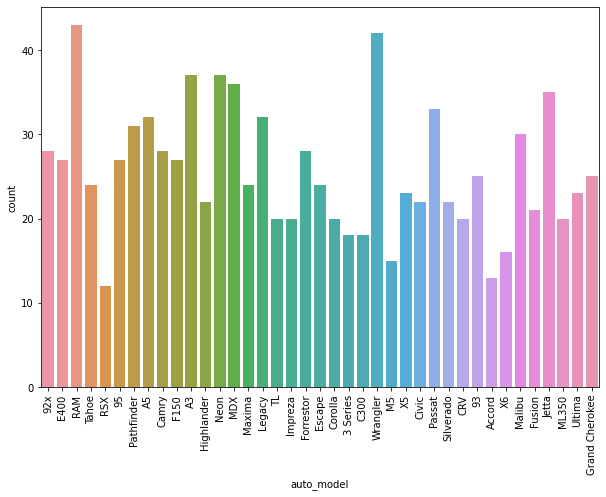

In [30]:
#Auto model
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("auto_model", data=df)

In [ ]:
#car models RAM,Wranger,jetta saw most number of cases while R5x and X6 saw very less cases

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

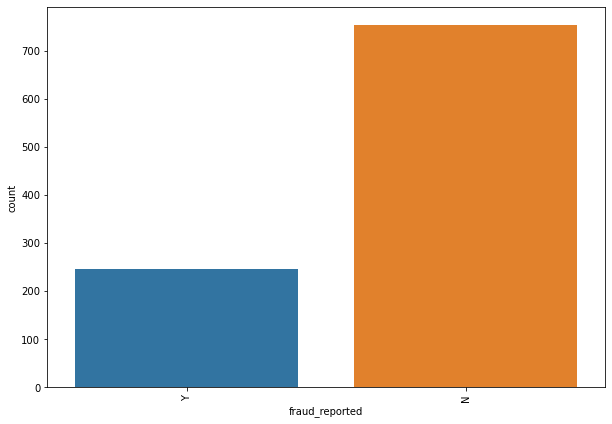

In [31]:
#fraud reported
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("fraud_reported", data=df)

In [ ]:
#in most of the cases there is no fraud detected, this is our dependent variable
#it is unbalanced data, 

In [32]:
#creating dataframe for columns other than object type
notcat=df.loc[:,['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']]

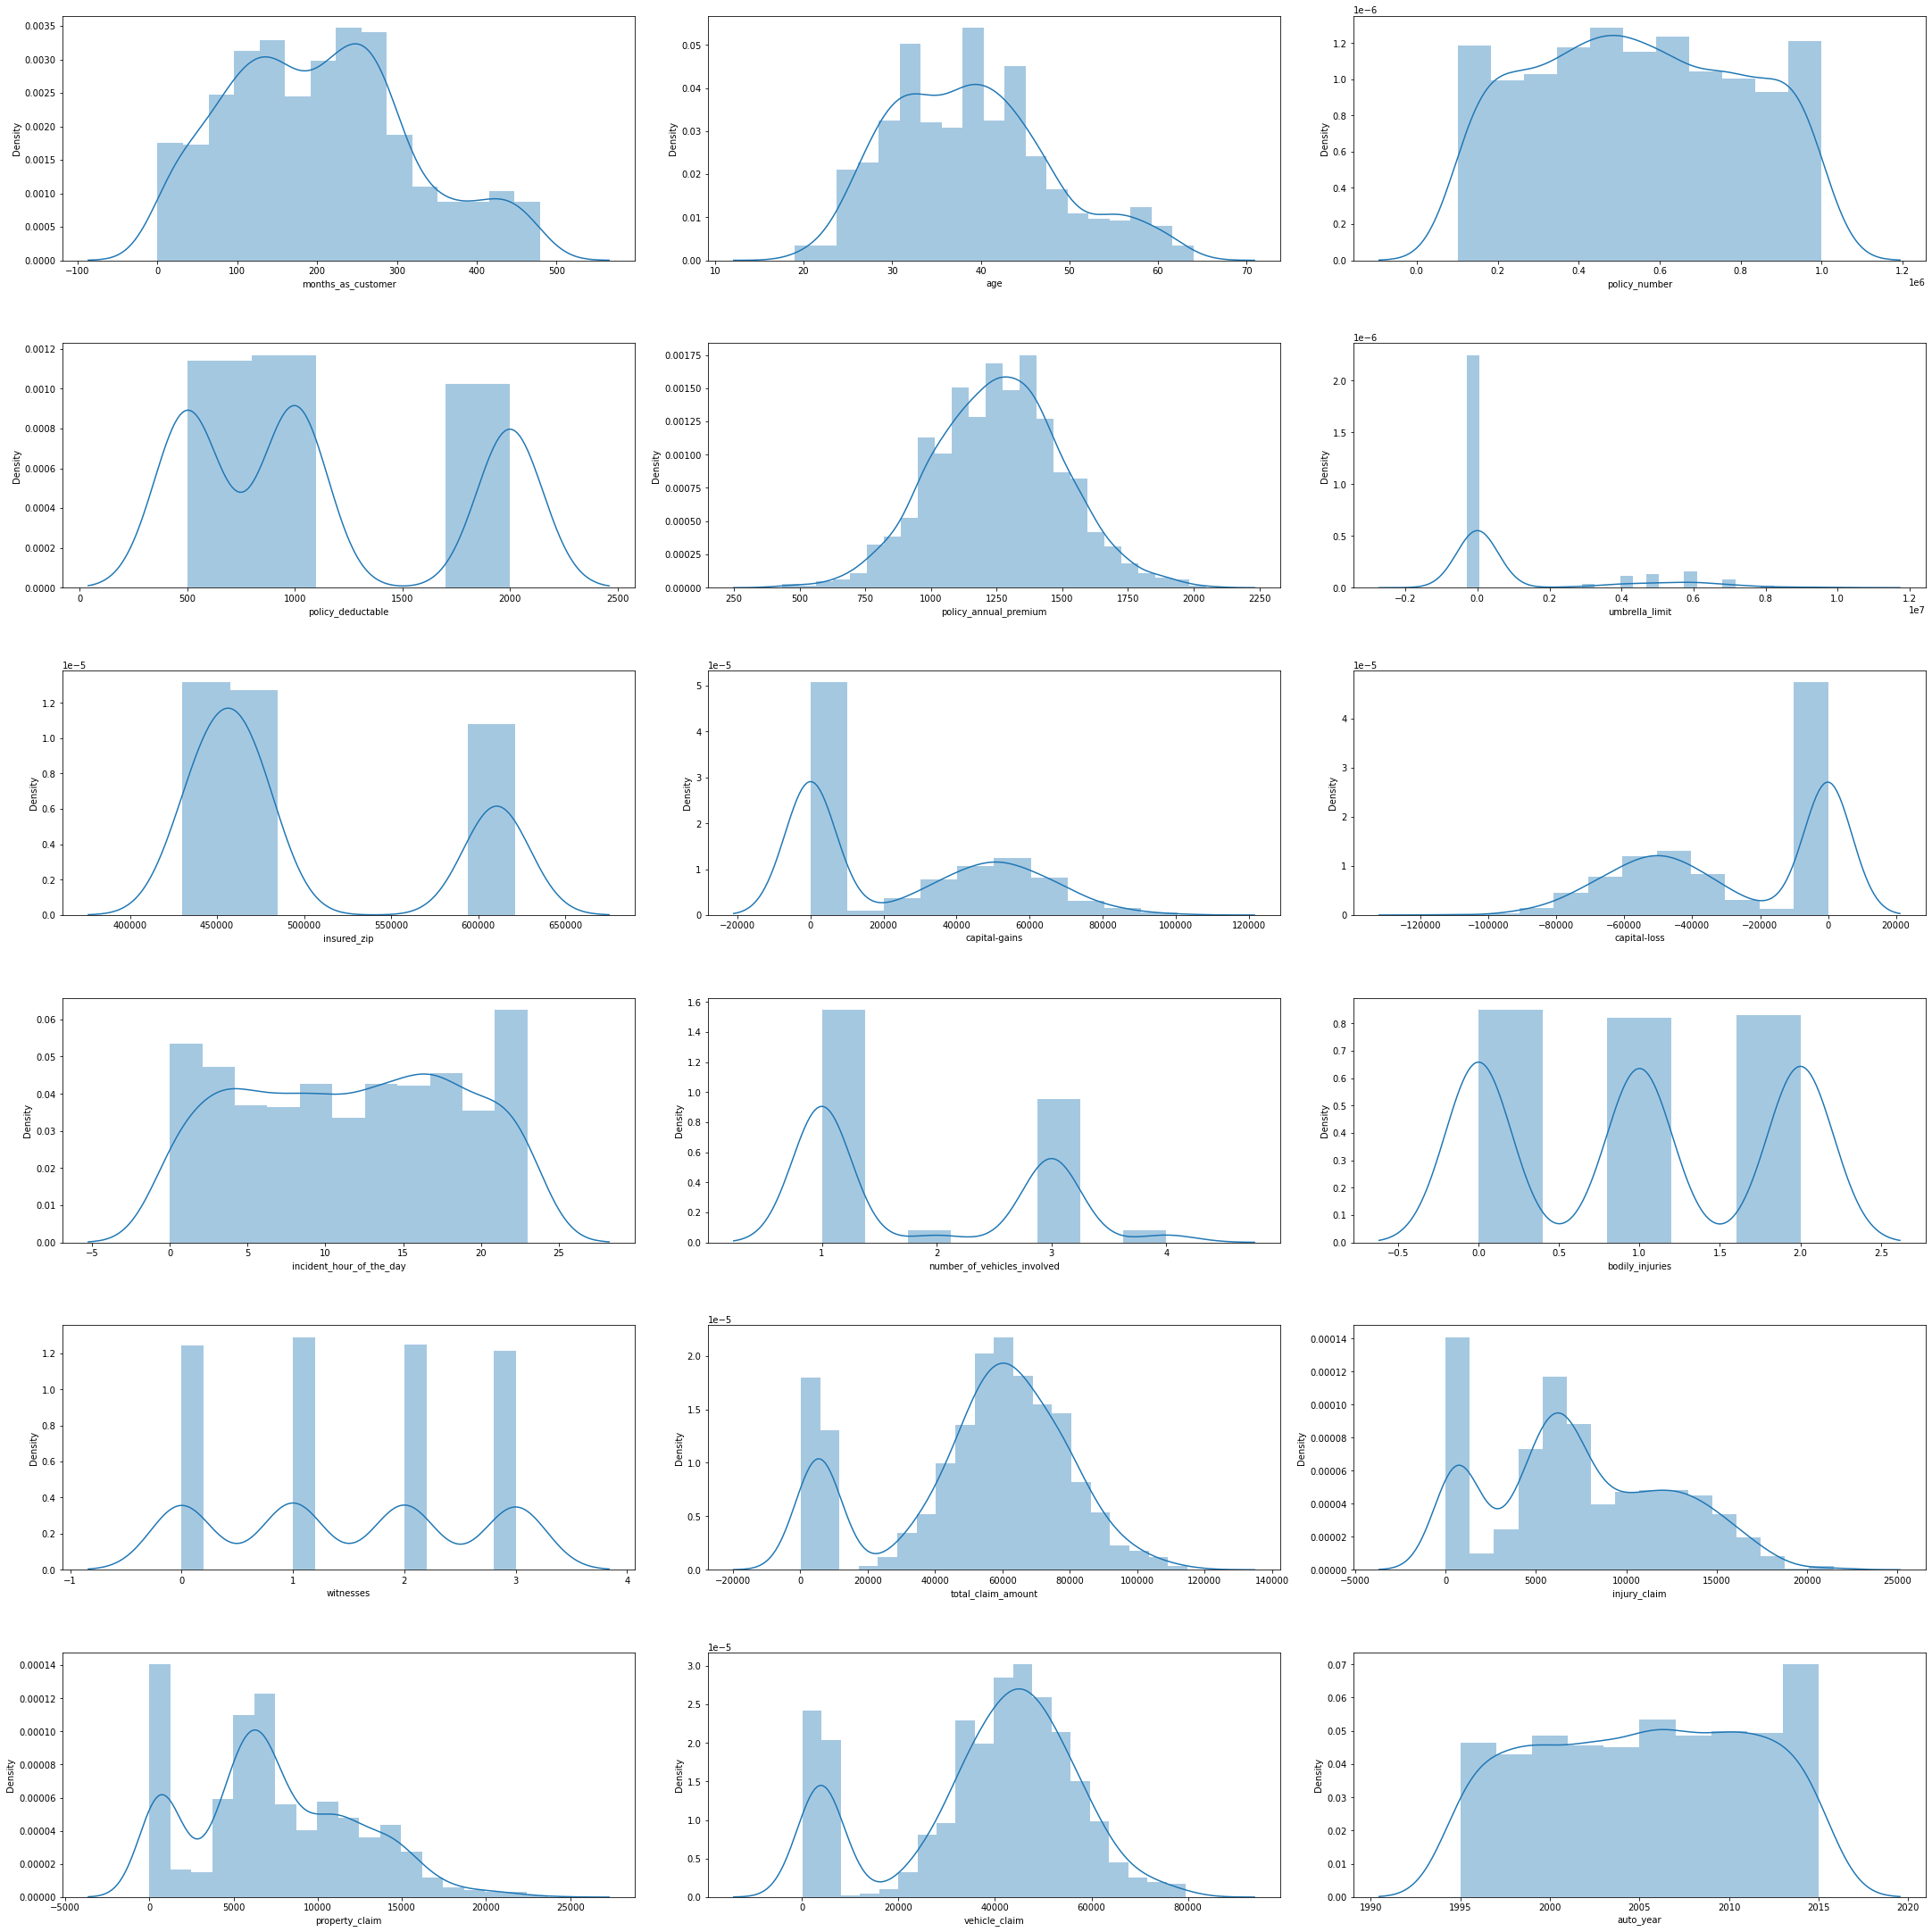

In [33]:
#ploting distplot for int and float variable
fig, ax=plt.subplots(ncols=3,nrows=6, figsize=(30,30))
index=0
ax=ax.flatten()
for col, value in notcat.items():
    if col != "type":
        sns.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#most of the variable are right skwed
#there is gap in policy deductable between 1000 and 2000
#most of the property clam are zero
#the maximum vechile involved in a case is 4
#the auto year cover from 199 to 2015
#majority of injury claim is 0
#the average total claim amount is 60k however there are 0 ruppe claim also
#the maximum capitol loss is around 90k

In [34]:
#droping variables
df.drop(["policy_bind_date",'incident_location',"policy_number"],axis=1,inplace=True)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

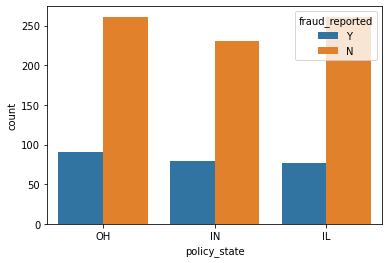

In [35]:
#Policy sate
sns.countplot("policy_state", data=df, hue="fraud_reported")

In [ ]:
#There are slightly more number of fraud detected in Oh than others

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

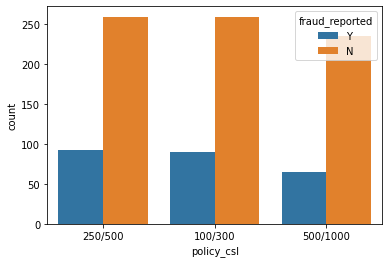

In [36]:
#Plicy_csl
sns.countplot("policy_csl", data=df, hue="fraud_reported")

In [ ]:
#the policy csl 500/1000 saw least number of fraud

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

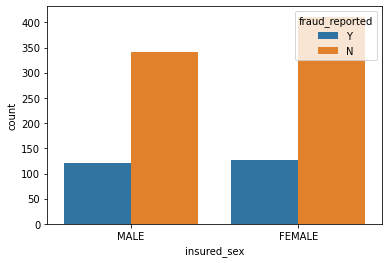

In [37]:
#insured_sex
sns.countplot("insured_sex", data=df, hue="fraud_reported")

In [ ]:
#the data is nearly equal

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

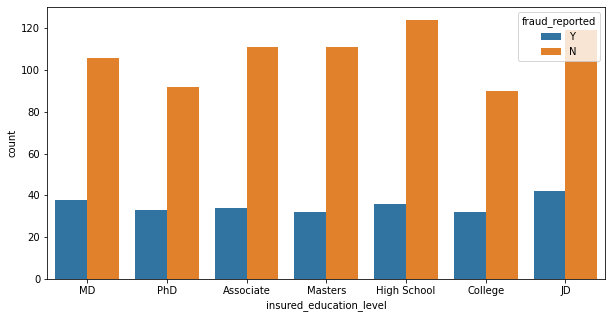

In [38]:
#Insured education level
plt.figure(figsize=(10,5))
sns.countplot("insured_education_level", data=df, hue="fraud_reported")

In [ ]:
#people with Juris Doctor abbreviated as JD commited more number of fraud than others

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

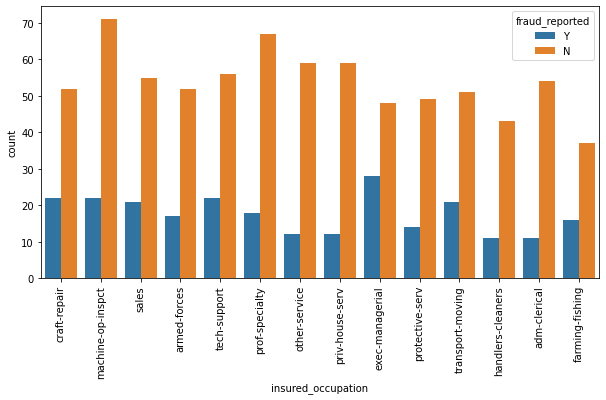

In [39]:
#Insure_occupation
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("insured_occupation", data=df, hue="fraud_reported")

In [ ]:
#people in exex managarial commited highest number of fraud while people in other services commited least ammount of fraud 

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

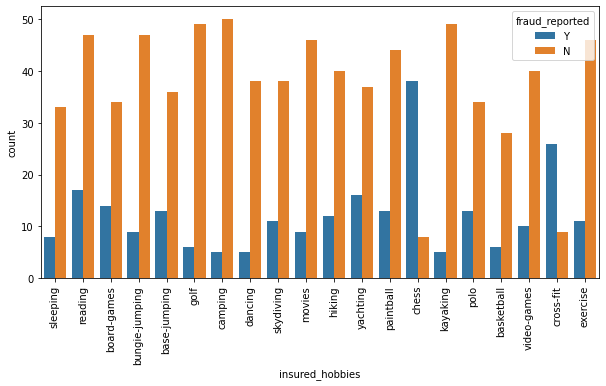

In [40]:
#insured hobbies
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("insured_hobbies", data=df, hue="fraud_reported")

In [ ]:
#people who play chess has commited highest number of fraud

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

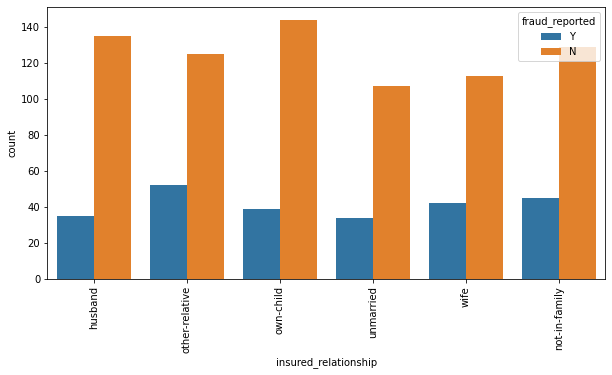

In [41]:
#Insured relationship
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("insured_relationship", data=df, hue="fraud_reported")

In [ ]:
#insured relatives people has commited more fraud than others

<AxesSubplot:xlabel='incident_date', ylabel='count'>

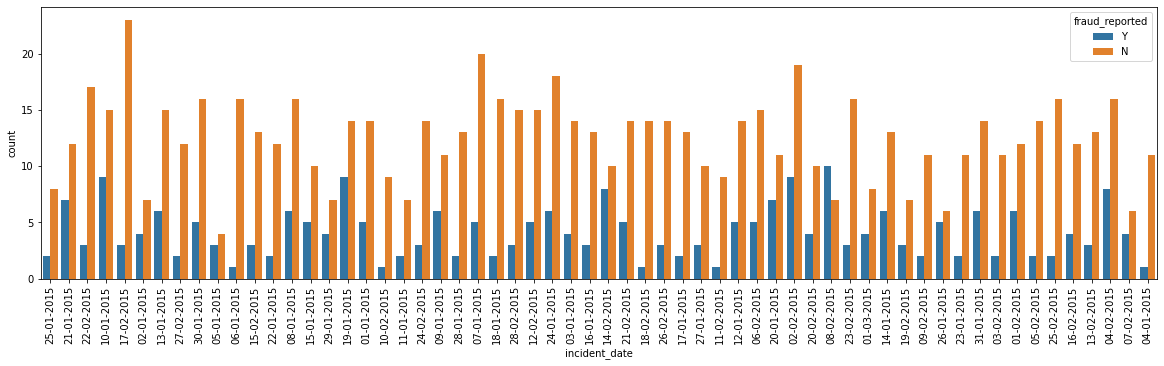

In [42]:
#Incident date
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot("incident_date", data=df, hue="fraud_reported")

<AxesSubplot:xlabel='incident_type', ylabel='count'>

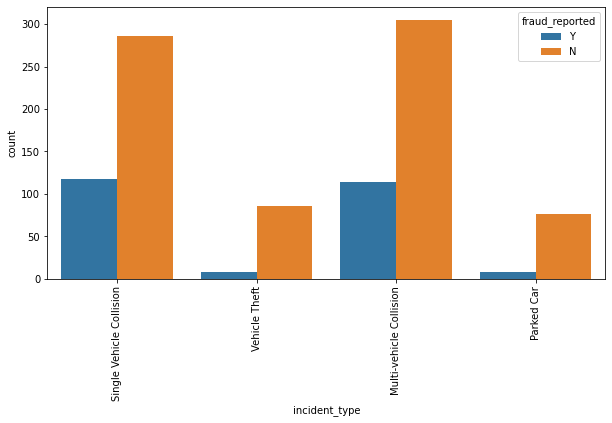

In [43]:
#incident type
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("incident_type", data=df, hue="fraud_reported")

In [ ]:
#in single veichal collision and multi collision incident most number of fraud has been detected

<AxesSubplot:xlabel='collision_type', ylabel='count'>

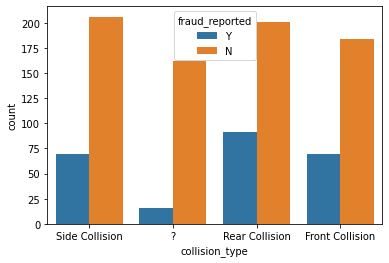

In [44]:
#collison type
sns.countplot("collision_type", data=df, hue="fraud_reported")

In [ ]:
#in rear collision more number of fraud has been detected

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

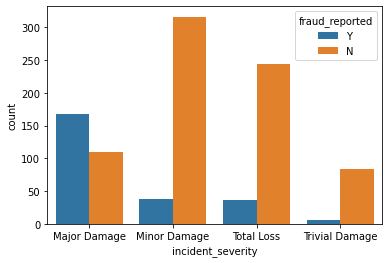

In [45]:
#incident sevearity
sns.countplot("incident_severity", data=df, hue="fraud_reported")

In [ ]:
#in major damage more number of fraud cases are detected

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

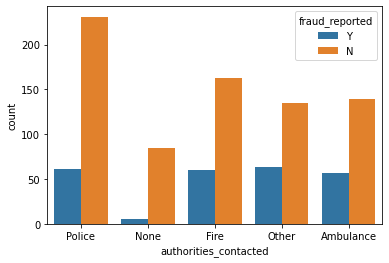

In [46]:
#authorities contacted
sns.countplot("authorities_contacted", data=df, hue="fraud_reported")

In [ ]:
#in the condition where no authoriters were informed sees very less numbr of fraud

<AxesSubplot:xlabel='incident_state', ylabel='count'>

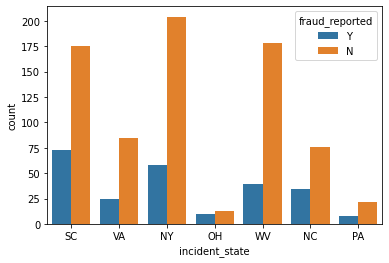

In [47]:
#Incident state
sns.countplot("incident_state", data=df, hue="fraud_reported")

In [ ]:
#SC and NY saw most number of fraud cases

<AxesSubplot:xlabel='incident_city', ylabel='count'>

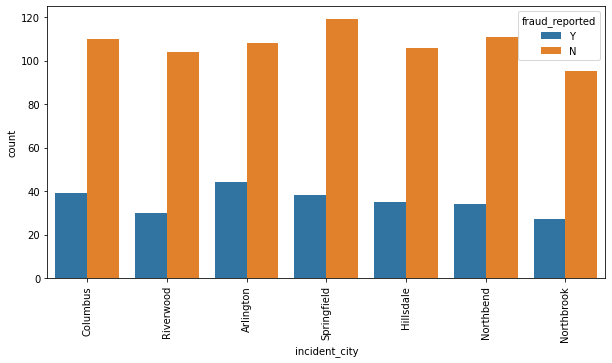

In [48]:
#Incident city
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("incident_city", data=df, hue="fraud_reported")

In [ ]:
#arlington saw more nmber of fraud cases

<AxesSubplot:xlabel='property_damage', ylabel='count'>

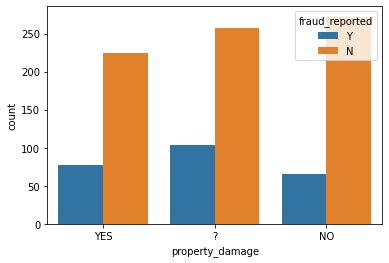

In [49]:
#Property damage
sns.countplot("property_damage", data=df, hue="fraud_reported")

In [ ]:
#in the condition when there is no surety of damage more number of fraud cases has been detected

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

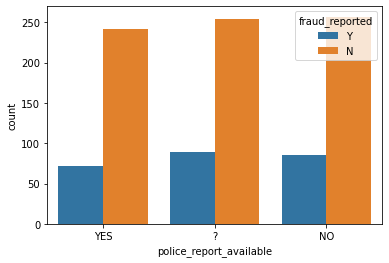

In [50]:
#Police report avalable
sns.countplot("police_report_available", data=df, hue="fraud_reported")

In [ ]:
#in the senario where there is no surety of availability of police record more number of fraud cases has been detected

<AxesSubplot:xlabel='auto_make', ylabel='count'>

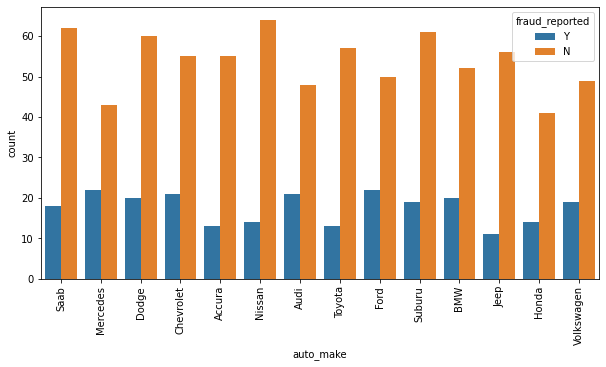

In [51]:
#automake
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("auto_make", data=df, hue="fraud_reported")

In [ ]:
#mercedess, audi,ford saw more number of fraud ases than others

<AxesSubplot:xlabel='auto_model', ylabel='count'>

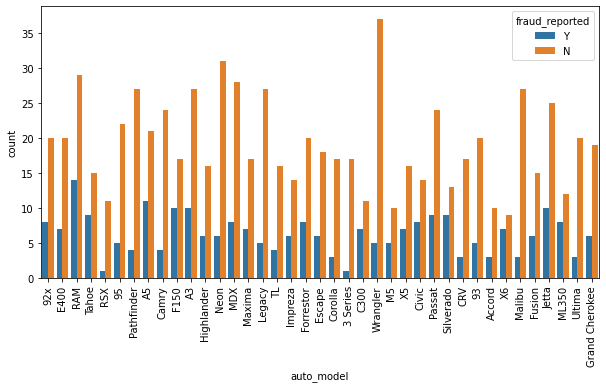

In [52]:
#auto model
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("auto_model", data=df, hue="fraud_reported")

In [ ]:
#RAM saw most number of fraud cases

In [54]:
#converting incident date in month nad date
df['incident_month'] = pd.DatetimeIndex(df['incident_date']).month
df['incident_Day'] = pd.DatetimeIndex(df['incident_date']).day

In [56]:
#droping incident date
df.drop("incident_date",axis=1,inplace=True)

In [57]:
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["policy_state"]=encoder.fit_transform(df['policy_state'])
df["policy_csl"]=encoder.fit_transform(df['policy_csl'])
df["insured_sex"]=encoder.fit_transform(df['insured_sex'])
df["insured_education_level"]=encoder.fit_transform(df['insured_education_level'])
df["insured_occupation"]=encoder.fit_transform(df['insured_occupation'])
df["insured_hobbies"]=encoder.fit_transform(df['insured_hobbies'])
df["insured_relationship"]=encoder.fit_transform(df['insured_relationship'])
df["incident_type"]=encoder.fit_transform(df['incident_type'])
df["collision_type"]=encoder.fit_transform(df['collision_type'])
df["incident_severity"]=encoder.fit_transform(df['incident_severity'])
df["authorities_contacted"]=encoder.fit_transform(df['authorities_contacted'])
df["incident_state"]=encoder.fit_transform(df['incident_state'])
df["incident_city"]=encoder.fit_transform(df['incident_city'])

df["property_damage"]=encoder.fit_transform(df['property_damage'])
df["police_report_available"]=encoder.fit_transform(df['police_report_available'])
df["auto_make"]=encoder.fit_transform(df['auto_make'])
df["auto_model"]=encoder.fit_transform(df['auto_model'])
df["fraud_reported"]=encoder.fit_transform(df['fraud_reported'])


In [58]:
#checking head
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_month,incident_Day
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,71610,6510,13020,52080,10,1,2004,1,1,25
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,5070,780,780,3510,8,12,2007,1,1,21
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,34650,7700,3850,23100,4,30,2007,0,2,22
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,63400,6340,6340,50720,3,34,2014,1,10,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,6500,1300,650,4550,0,31,2009,0,2,17


<AxesSubplot:>

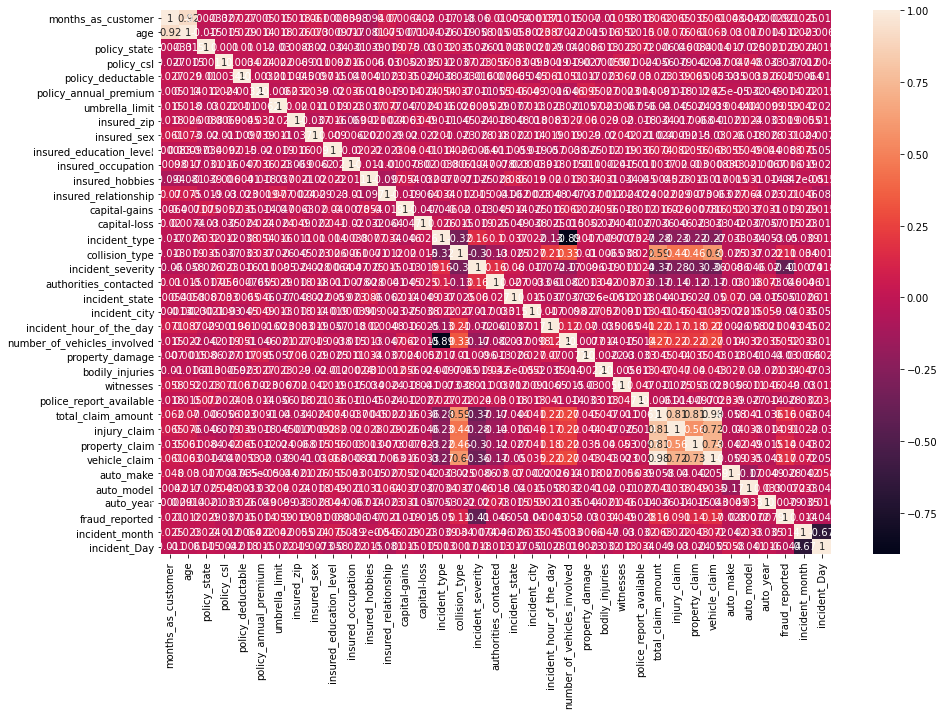

In [59]:
#checcking correlation
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [60]:
#since there are to many columns, sorting correlation with attrition in desending order
df.corr()["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
incident_month                 0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480
capital-loss                  -0.014863


In [61]:
#droping columns which is closer to zero 
df.drop(["insured_education_level","auto_year","incident_hour_of_the_day","insured_occupation","auto_model"],axis=1,inplace=True)

In [62]:
#checking shape
df.shape

(1000, 32)

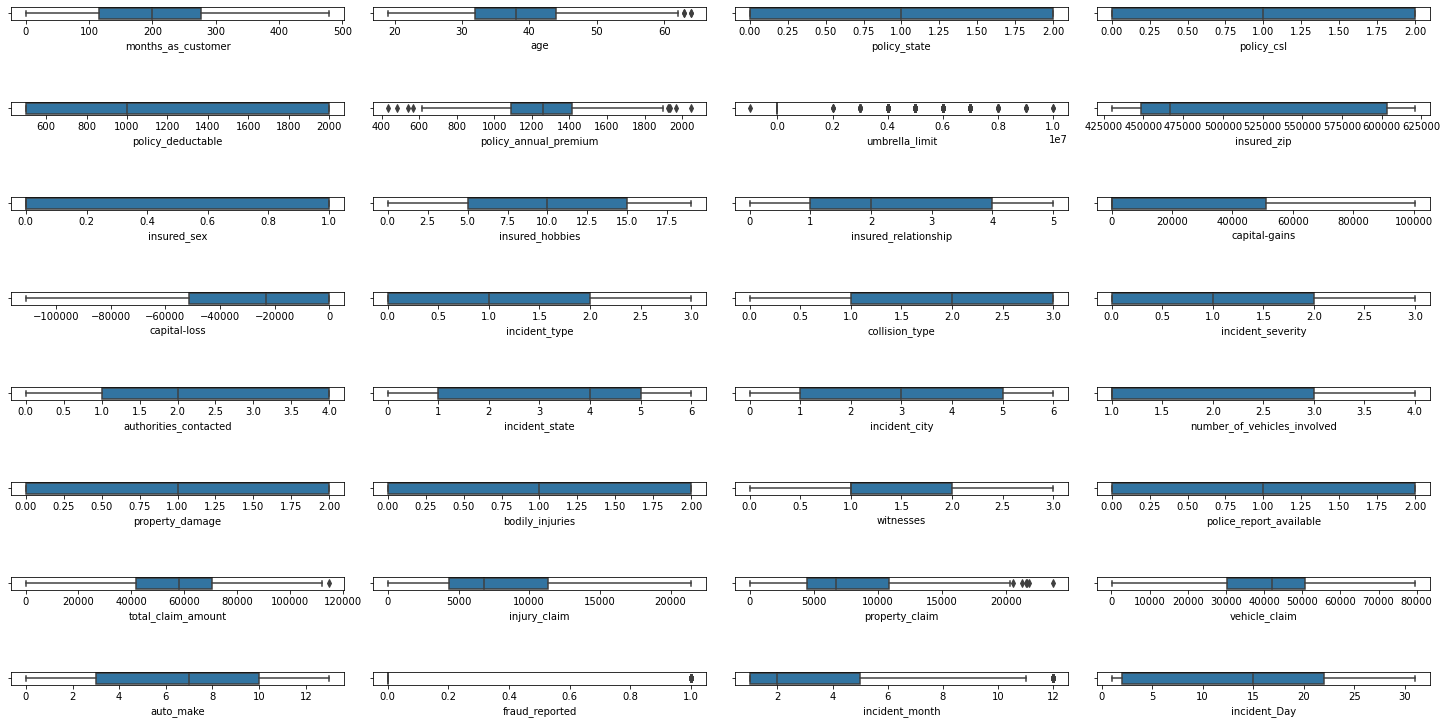

In [63]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=4,nrows=8, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#there are few outliers in some columns

In [64]:
from scipy.stats import  zscore
z=np.abs(zscore(df))
d1=df[(z<3).all(axis=1)]
d1

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,incident_month,incident_Day
0,328,48,2,1,1000,1406.91,0,466132,1,17,...,2,2,71610,6510,13020,52080,10,1,1,25
1,228,42,1,1,2000,1197.22,5000000,468176,1,15,...,0,0,5070,780,780,3510,8,1,1,21
2,134,29,2,0,2000,1413.14,5000000,430632,0,2,...,3,1,34650,7700,3850,23100,4,0,2,22
3,256,41,0,1,2000,1415.74,6000000,608117,0,2,...,2,1,63400,6340,6340,50720,3,1,10,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,2,...,1,1,6500,1300,650,4550,0,0,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,13,...,1,0,87200,17440,8720,61040,6,0,2,22
996,285,41,0,0,1000,1436.79,0,608177,0,17,...,3,0,108480,18080,18080,72320,13,0,1,24
997,130,34,2,1,500,1383.49,3000000,442797,0,3,...,3,2,67500,7500,7500,52500,11,0,1,23
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,1,2,46980,5220,5220,36540,1,0,2,26


In [66]:
#checking for skewness
d1.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.044659
total_claim_amount            -0.593593


In [67]:
#spliting data in x and y
x=d1.drop("fraud_reported", axis=1)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,incident_month,incident_Day
0,328,48,2,1,1000,1406.91,0,466132,1,17,...,1,2,2,71610,6510,13020,52080,10,1,25
1,228,42,1,1,2000,1197.22,5000000,468176,1,15,...,0,0,0,5070,780,780,3510,8,1,21
2,134,29,2,0,2000,1413.14,5000000,430632,0,2,...,2,3,1,34650,7700,3850,23100,4,2,22
3,256,41,0,1,2000,1415.74,6000000,608117,0,2,...,1,2,1,63400,6340,6340,50720,3,10,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,2,...,0,1,1,6500,1300,650,4550,0,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,13,...,0,1,0,87200,17440,8720,61040,6,2,22
996,285,41,0,0,1000,1436.79,0,608177,0,17,...,2,3,0,108480,18080,18080,72320,13,1,24
997,130,34,2,1,500,1383.49,3000000,442797,0,3,...,2,3,2,67500,7500,7500,52500,11,1,23
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,0,1,2,46980,5220,5220,36540,1,2,26


In [68]:
y=d1["fraud_reported"]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [69]:
# treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

months_as_customer            -0.133972
age                           -0.002183
policy_state                  -0.150765
policy_csl                    -0.096814
policy_deductable              0.022179
policy_annual_premium         -0.007258
umbrella_limit                -7.932397
insured_zip                    0.000000
insured_sex                    0.139324
insured_hobbies               -0.248575
insured_relationship          -0.160168
capital-gains                  0.031294
capital-loss                   0.088750
incident_type                 -0.095572
collision_type                -0.204055
incident_severity             -0.079569
authorities_contacted         -0.223816
incident_state                -0.256064
incident_city                 -0.181833
number_of_vehicles_involved    0.372833
property_damage               -0.093063
bodily_injuries               -0.133824
witnesses                     -0.151669
police_report_available       -0.117961
total_claim_amount            -0.508540


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

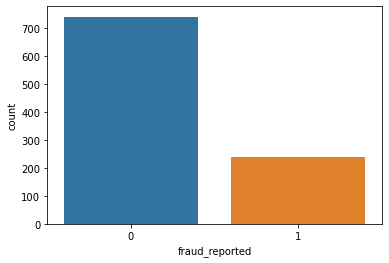

In [70]:
#the dependent varible is unbalenced
sns.countplot(y)

In [71]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

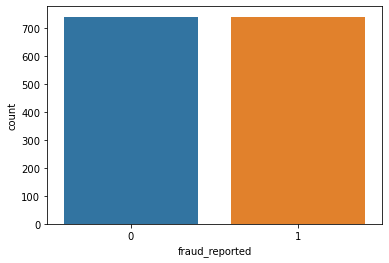

In [72]:
#balanced data
sns.countplot(y)

In [73]:
#importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [74]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)

In [75]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1036, 31), (444, 31), (1036,), (444,))

In [76]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
    print("cross val score ",cross_val_score(model,x,y,cv=5).mean())

In [77]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.79      0.79      0.79       236
           1       0.76      0.76      0.76       208

    accuracy                           0.78       444
   macro avg       0.78      0.78      0.78       444
weighted avg       0.78      0.78      0.78       444

The accuracy score is:  0.7792792792792793
The confusion matrix is:
    
     [[187  49]
 [ 49 159]]
cross val score  0.7939189189189189


In [78]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.89      0.86      0.87       236
           1       0.84      0.88      0.86       208

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

The accuracy score is:  0.8671171171171171
The confusion matrix is:
    
     [[202  34]
 [ 25 183]]
cross val score  0.8621621621621622


In [79]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.54      0.79      0.64       236
           1       0.51      0.24      0.33       208

    accuracy                           0.53       444
   macro avg       0.52      0.52      0.48       444
weighted avg       0.52      0.53      0.49       444

The accuracy score is:  0.5337837837837838
The confusion matrix is:
    
     [[187  49]
 [158  50]]
cross val score  0.5283783783783783


In [80]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.74      0.34      0.47       236
           1       0.54      0.87      0.66       208

    accuracy                           0.59       444
   macro avg       0.64      0.60      0.56       444
weighted avg       0.64      0.59      0.56       444

The accuracy score is:  0.5855855855855856
The confusion matrix is:
    
     [[ 80 156]
 [ 28 180]]
cross val score  0.5932432432432432


In [81]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.81      0.59      0.68       236
           1       0.65      0.84      0.73       208

    accuracy                           0.71       444
   macro avg       0.73      0.72      0.71       444
weighted avg       0.73      0.71      0.71       444

The accuracy score is:  0.7094594594594594
The confusion matrix is:
    
     [[140  96]
 [ 33 175]]
cross val score  0.6925675675675675


In [ ]:
#since randomforestclassifier has more accuracy score than others alse the coss val score is nearly equal of the accuracy score.
#randomforestclassifier is our best model

In [83]:
#setting parameters for hyperpara,ters tunning
parameter={"criterion":["gini","entropy"],
           "max_depth":np.arange(1,10),
           "min_samples_split" : np.arange(1,10),
           "max_features" :["auto","sqrt","log2"],
           "n_estimators":[100,200,300,400,500,600]
          }

In [86]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [87]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 200, 300, 400, 500, 600]})

In [88]:
#checking best parameters
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [277]:
#building final model
best_model=RandomForestClassifier(criterion="gini",max_depth=9,max_features="auto",min_samples_split=2,n_estimators=100)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, pred))
       
print("The accuracy score is: ", accuracy_score(y_test,pred))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,pred))

The classification report is:
                   precision    recall  f1-score   support

           0       0.89      0.86      0.88       236
           1       0.85      0.88      0.87       208

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

The accuracy score is:  0.8738738738738738
The confusion matrix is:
    
     [[204  32]
 [ 24 184]]


In [ ]:
#auc_roc curve

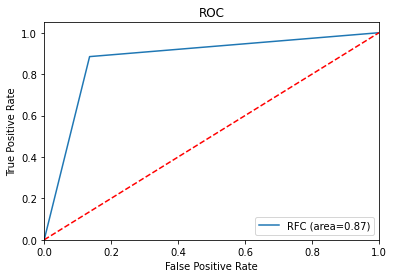

In [281]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="RFC (area=%0.2f)" % rfc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("RFC_ROC")
plt.show()

In [ ]:
#87 percent of the area are under the curve

In [279]:
#savingThemodel
import joblib
joblib.dump(best_model,"Fraud_detection_Attrition.pkl")

['Fraud_detection_Attrition.pkl']